In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm

In [2]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [3]:
diffmats = np.load('../../Data/Genemaps/CVAE_diffmats_S661.npy')
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')

In [4]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()
nsubjects = diffmats.shape[0]
ngenes = len(genemaps)
gene_fmri_corr = np.zeros((ngenes,nsubjects))

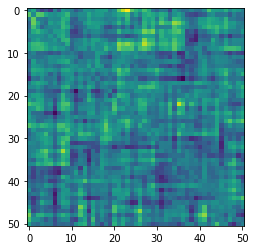

In [5]:
#first subject
first_subject_diffmat = diffmats[0,:,:]
plt.imshow(first_subject_diffmat)

In [6]:
absolute_diffmat = np.zeros((661,51))
absolute_diffmat.shape

(661, 51)

In [7]:
#taking absolute sum of all subject diffmats
for s in tqdm(range(nsubjects)):
    subject_diffmat = diffmats[s,:,:]
    abs_sum = abs(subject_diffmat).sum(axis=1) #51 vector
    absolute_diffmat[s,:] = abs_sum

100%|██████████| 661/661 [00:00<00:00, 154530.68it/s]


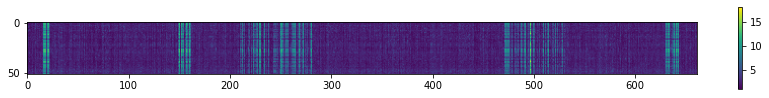

In [8]:
plt.figure(figsize=(15,5))
plt.imshow(absolute_diffmat.transpose())
plt.colorbar(shrink=.3)

In [9]:
roi_expression = np.zeros((13,51))
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression[g,:] = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])

100%|██████████| 13/13 [00:00<00:00, 20.16it/s]


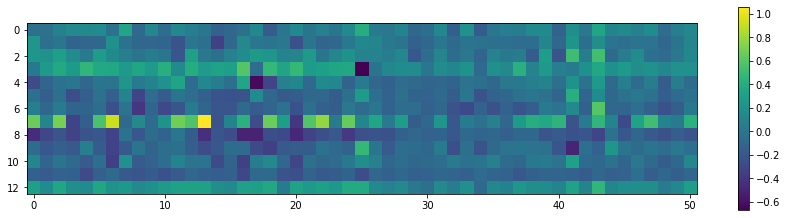

In [10]:
plt.figure(figsize=(15,5))
plt.imshow(roi_expression)
plt.colorbar(shrink=.75)

In [11]:
# Cross Correlate
gene_fmri_corr.shape

(13, 661)

In [12]:
for s in tqdm(range(nsubjects)):
    for g in range(ngenes):
        gene_fmri_corr[g,s] = np.corrcoef(absolute_diffmat[s,:],roi_expression[g,:])[0,1]

100%|██████████| 661/661 [00:00<00:00, 1208.35it/s]


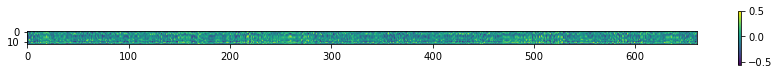

In [13]:
plt.figure(figsize=(15,2))
plt.imshow(gene_fmri_corr)
plt.colorbar(shrink=.5)

Text(0, 0.5, 'Amount of Subjects')

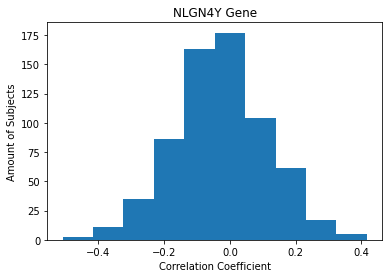

In [64]:
#histogram for first gene, NLGN4Y
g1 = gene_fmri_corr[0,:]
plt.hist(g1)
plt.title('NLGN4Y Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

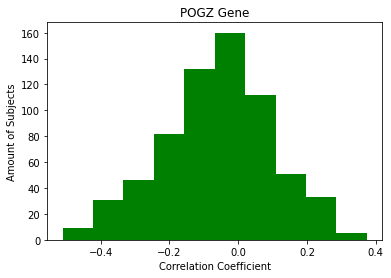

In [65]:
#histogram for second gene, POGZ
g1 = gene_fmri_corr[1,:]
plt.hist(g1,color='green')
plt.title('POGZ Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

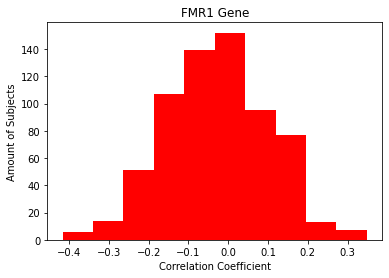

In [66]:
#histogram for third gene, FMR1
g1 = gene_fmri_corr[2,:]
plt.hist(g1,color='red')
plt.title('FMR1 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

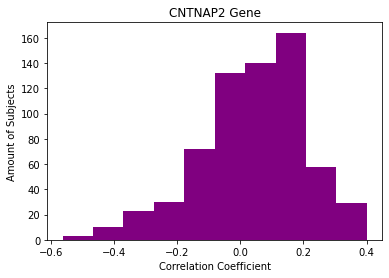

In [67]:
#histogram for fourth gene, CNTNAP2
g1 = gene_fmri_corr[3,:]
plt.hist(g1,color='purple')
plt.title('CNTNAP2 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

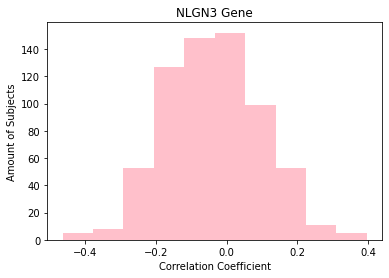

In [68]:
#histogram for fifth gene, NLGN3
g1 = gene_fmri_corr[4,:]
plt.hist(g1,color='pink')
plt.title('NLGN3 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

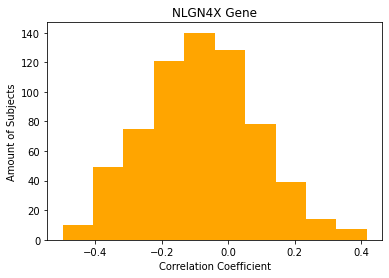

In [69]:
#histogram for sixth gene, NLGN4X
g1 = gene_fmri_corr[5,:]
plt.hist(g1,color='orange')
plt.title('NLGN4X Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

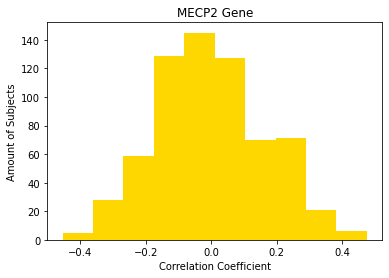

In [70]:
#histogram for seventh gene, MECP2
g1 = gene_fmri_corr[6,:]
plt.hist(g1,color='gold')
plt.title('MECP2 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

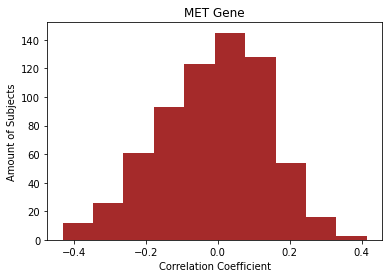

In [71]:
#histogram for eighth gene, MET
g1 = gene_fmri_corr[7,:]
plt.hist(g1,color='brown')
plt.title('MET Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

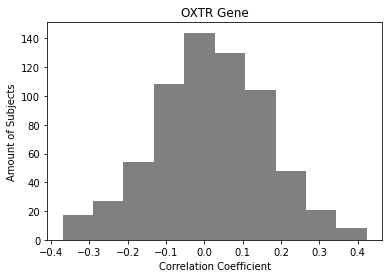

In [72]:
#histogram for ninth gene, OXTR
g1 = gene_fmri_corr[8,:]
plt.hist(g1,color='gray')
plt.title('OXTR Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

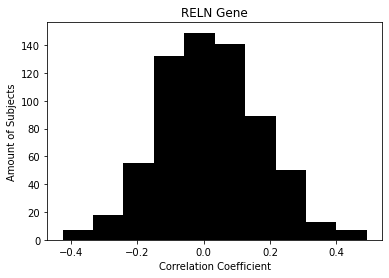

In [73]:
#histogram for tenth gene, RELN
g1 = gene_fmri_corr[9,:]
plt.hist(g1,color='black')
plt.title('RELN Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

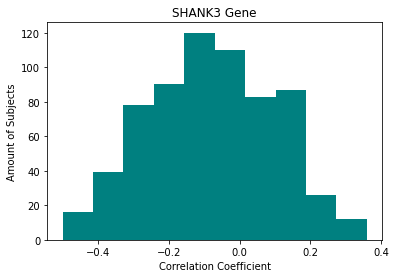

In [74]:
#histogram for eleventh gene, SHANK3
g1 = gene_fmri_corr[10,:]
plt.hist(g1,color='teal')
plt.title('SHANK3 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

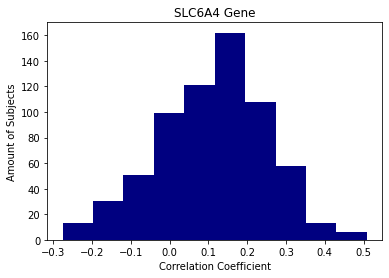

In [75]:
#histogram for twelfth gene, SLC6A4
g1 = gene_fmri_corr[11,:]
plt.hist(g1,color='navy')
plt.title('SLC6A4 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

Text(0, 0.5, 'Amount of Subjects')

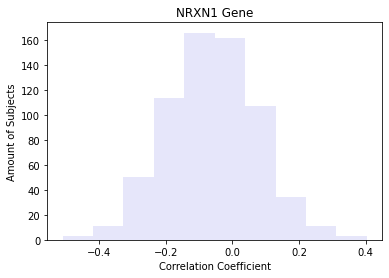

In [76]:
#histogram for thirteenth gene, NRXN1
g1 = gene_fmri_corr[12,:]
plt.hist(g1,color='lavender')
plt.title('NRXN1 Gene')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amount of Subjects')

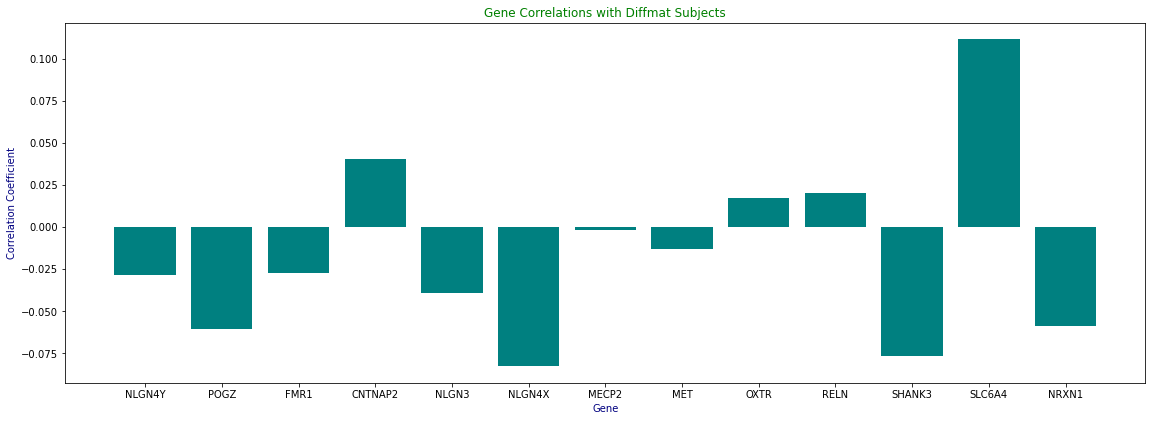

In [20]:
#bar graph of sum of correlation coefficients for all genes
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
g1 = np.mean(gene_fmri_corr[0,:])
g2 = np.mean(gene_fmri_corr[1,:])
g3 = np.mean(gene_fmri_corr[2,:])
g4 = np.mean(gene_fmri_corr[3,:])
g5 = np.mean(gene_fmri_corr[4,:])
g6 = np.mean(gene_fmri_corr[5,:])
g7 = np.mean(gene_fmri_corr[6,:])
g8 = np.mean(gene_fmri_corr[7,:])
g9 = np.mean(gene_fmri_corr[8,:])
g10 = np.mean(gene_fmri_corr[9,:])
g11 = np.mean(gene_fmri_corr[10,:])
g12 = np.mean(gene_fmri_corr[11,:])
g13 = np.mean(gene_fmri_corr[12,:])
g = [g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13]
ax.bar(labels,g,color='teal')
plt.title('Gene Correlations with Diffmat Subjects',color='green')
plt.ylabel('Correlation Coefficient',color='navy')
plt.xlabel('Gene',color='navy')
plt.show()

In [22]:
#single sample t-test
from scipy.stats import ttest_1samp
for i in range(0,13):
    t,p=ttest_1samp(gene_fmri_corr[i,:], 0, axis=0, nan_policy='propagate', alternative='two-sided')
    print(f'{labels[i]},{t:.2f},{p:.3f}')

NLGN4Y,-5.19,0.000
POGZ,-9.75,0.000
FMR1,-5.37,0.000
CNTNAP2,6.17,0.000
NLGN3,-7.32,0.000
NLGN4X,-12.68,0.000
MECP2,-0.27,0.785
MET,-2.21,0.027
OXTR,3.00,0.003
RELN,3.44,0.001
SHANK3,-11.18,0.000
SLC6A4,20.47,0.000
NRXN1,-11.19,0.000
